# **Sequence vectorization**
This notebook can be used to recreate the paper's figure about sequence vectorization for Faiss clustering. To use the notebook, clone *clusTCR*'s github repository ([https://github.com/svalkiers/clusTCR](https://github.com/svalkiers/clusTCR)) onto your device and pasting the path to the repo down here.

In [1]:
import os

# Path to clusTCR repo goes here:
os.chdir('/home/sebastiaan/PhD/Repositories/clusTCR/')

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time
import re

from clustcr.modules.faiss_clustering.src.profile.properties import *
from clustcr.clustering.clustering import Clustering
from clustcr.input import datasets

Set plot aesthetics

In [3]:
plt.style.use(['seaborn-white', 'seaborn-paper'])
plt.rc('font', family='serif')
sns.set_palette('Set1')
sns.set_context('paper', font_scale=1.3)

Calculate metrics for different combinations of physicochemical features.

['basicity', 'helicity', 'hydrophobicity']
['z_scores1', 'z_scores2', 'z_scores3']
['pI', 'z_scores1', 'z_scores2', 'z_scores3']
['mutation_stability', 'z_scores1', 'z_scores2', 'z_scores3']
['basicity', 'helicity', 'z_scores1', 'z_scores2', 'z_scores3']
['basicity', 'helicity', 'hydrophobicity', 'z_scores1', 'z_scores2', 'z_scores3']
['basicity', 'helicity', 'hydrophobicity', 'mutation_stability']
['basicity', 'helicity', 'mutation_stability', 'z_scores1', 'z_scores2', 'z_scores3']
['basicity', 'helicity', 'mutation_stability', 'pI', 'z_scores1', 'z_scores2', 'z_scores3']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


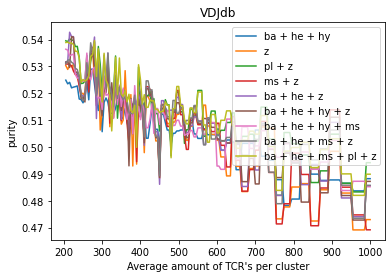

['basicity', 'helicity', 'hydrophobicity']
['z_scores1', 'z_scores2', 'z_scores3']
['pI', 'z_scores1', 'z_scores2', 'z_scores3']
['mutation_stability', 'z_scores1', 'z_scores2', 'z_scores3']
['basicity', 'helicity', 'z_scores1', 'z_scores2', 'z_scores3']
['basicity', 'helicity', 'hydrophobicity', 'z_scores1', 'z_scores2', 'z_scores3']
['basicity', 'helicity', 'hydrophobicity', 'mutation_stability']
['basicity', 'helicity', 'mutation_stability', 'z_scores1', 'z_scores2', 'z_scores3']
['basicity', 'helicity', 'mutation_stability', 'pI', 'z_scores1', 'z_scores2', 'z_scores3']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


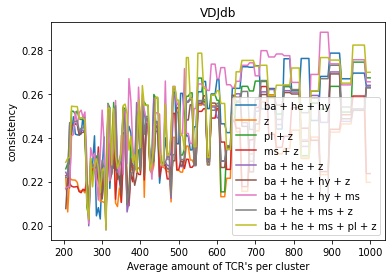

In [21]:
def main():
    cdr3 = datasets.vdjdb_cdr3()
    epitopes = datasets.vdjdb_epitopes()
    plot_property_measures(cdr3, epitopes, lambda x: x.purity()[0], title='VDJdb', y_label='purity')
    plot_property_measures(cdr3, epitopes, lambda x: x.consistency()[0], title='VDJdb', y_label='consistency')


def plot_property_measures(cdr3, epitopes, metrics_func, title, y_label=''):
    plt.figure()

    COMBOS = [
        [BASICITY, HELICITY, HYDROPHOBICITY],
        Z_SCORES,
        [ISOELECTRIC, *Z_SCORES],
        [MUTATION_STABILITY, *Z_SCORES],
        [BASICITY, HELICITY, *Z_SCORES],
        [BASICITY, HELICITY, HYDROPHOBICITY, *Z_SCORES],
        [BASICITY, HELICITY, HYDROPHOBICITY, MUTATION_STABILITY],
        [BASICITY, HELICITY, MUTATION_STABILITY, *Z_SCORES],
        [BASICITY, HELICITY, MUTATION_STABILITY, ISOELECTRIC, *Z_SCORES],
    ]
    
    mapping = {'basicity':'ba', 'helicity':'he', 
           'hydrophobicity':'hy', 'mutation_stability':'ms'}
    
    c = 0
    for combo in COMBOS:
        print(combo)
        x = []
        y = []
        z = []
        for i in range(205, 1005, 5):
            clustering = Clustering(method='faiss', faiss_cluster_size=i)
            clustering.faiss_properties = combo
            t0 = time.time()
            result = clustering.fit(cdr3)
            t1 = time.time()
            metrics = result.metrics(epitopes)
            x.append(i)
            y.append(metrics_func(metrics))
            z.append(t1-t0)
        atchley_string = ' + '.join(ATCHLEY_FACTORS)
        z_string = ' + '.join(Z_SCORES)
        rep = dict((re.escape(k), v) for k, v in mapping.items())
        pattern = re.compile("|".join(rep.keys()))
        combo_new = []
        for item in combo:
            combo_new.append(pattern.sub(lambda m: rep[re.escape(m.group(0))], item))
        label = ' + '.join(combo_new).replace(atchley_string, 'atchley').replace(z_string, 'z')
        if c == 0:
            res = pd.DataFrame({'avg_cluster_size':x,
                                 '{}'.format(y_label):y, 't':z,
                                'combo':[label]*len(x)})
            c += 1
        else:
            data = pd.DataFrame({'avg_cluster_size':x,
                                 '{}'.format(y_label):y, 't':z,
                                'combo':[label]*len(x)})
            res = res.append(data)

    res.to_csv('results/faiss_vectorization_{}_2.tsv'.format(y_label), sep='\t', index=False)


if __name__ == '__main__':
    main()

Generate figure and save to file.

/home/sebastiaan/miniconda3/envs/tcr/lib/python3.6/site-packages/ipykernel_launcher.py:68: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


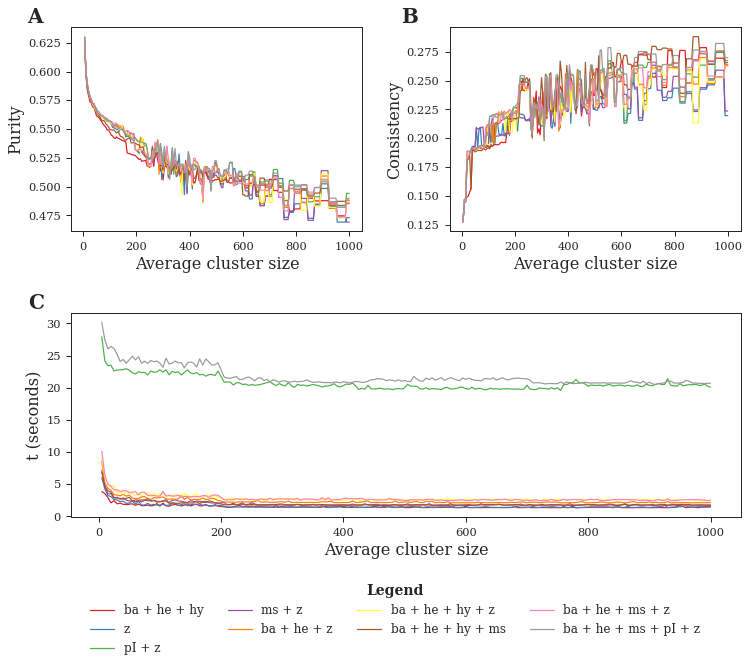

In [5]:
# Read data
purity = pd.read_csv('./results/faiss_vectorization_purity.tsv', sep='\t').rename(columns={'purity':'evaluation'})
consistency = pd.read_csv('./results/faiss_vectorization_consistency.tsv', sep='\t').rename(columns={'consistency':'evaluation'})

# Generate figure
fig = plt.figure(figsize=(12,10))
# fig.suptitle("VDJdb", fontsize=28, y=1.0)

gs = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

xdata = lambda x: x.avg_cluster_size
ydata = lambda x: x.evaluation

##########
# PURITY #
##########

for combo in purity.combo.unique():
    features = purity[purity.combo==combo]
    x = xdata(features)
    y = ydata(features)
    ax1.plot(x, y, label=combo)

ax1.set_xlabel("Average cluster size", fontsize=16)
ax1.set_ylabel("Purity", fontsize=16)

###############
# CONSISTENCY #
###############

for combo in consistency.combo.unique():
    features = consistency[consistency.combo==combo]
    x = xdata(features)
    y = ydata(features)
    ax2.plot(x, y, label=combo)

ax2.set_xlabel("Average cluster size", fontsize=16)
ax2.set_ylabel("Consistency", fontsize=16)

########
# TIME #
########

ydata = lambda x: x.t

for combo in purity.combo.unique():
    features = purity[purity.combo==combo]
    x = xdata(features)
    y = ydata(features)
    ax3.plot(x, y, label=combo)

ax3.set_xlabel("Average cluster size", fontsize=16)
ax3.set_ylabel("t (seconds)", fontsize=16)

# Figure legend
fig.subplots_adjust(bottom=0.20, wspace=.3, hspace=.4)
legend_labels = consistency.combo.unique()
legend = fig.legend([ax1, ax2],
                    labels=legend_labels,
                    loc="lower center",
                    borderaxespad=.1,
                    title="Legend",
                    fontsize="12",
                    ncol=4,
                    bbox_to_anchor=(.5, 0)
                   )

# Add subplot annotations
plt.setp(legend.get_title(),fontsize='14', fontweight='bold')
ax1.text(-0.1, 1.1, 'A', transform=ax1.transAxes,fontsize=20, fontweight='bold', va='top', ha='right')
ax2.text(-0.11, 1.1, 'B', transform=ax2.transAxes,fontsize=20, fontweight='bold', va='top', ha='right')
ax3.text(-0.04, 1.1, 'C', transform=ax3.transAxes,fontsize=20, fontweight='bold', va='top', ha='right')

# Save figure
fig.savefig('results/figures/sequence_vectorization.eps', format='eps', bbox_inches='tight')